# Regularisation, Ridge and Lasso regression

In [1]:
import numpy as np
import sklearn 
import matplotlib as mpl
import matplotlib.pyplot as plt
import sklearn.linear_model
import sklearn.preprocessing
plt.style.use("seaborn-v0_8")

## Generate data set

We pick datapoints from a quadratic curve that is perturbed with Gaussian noise.

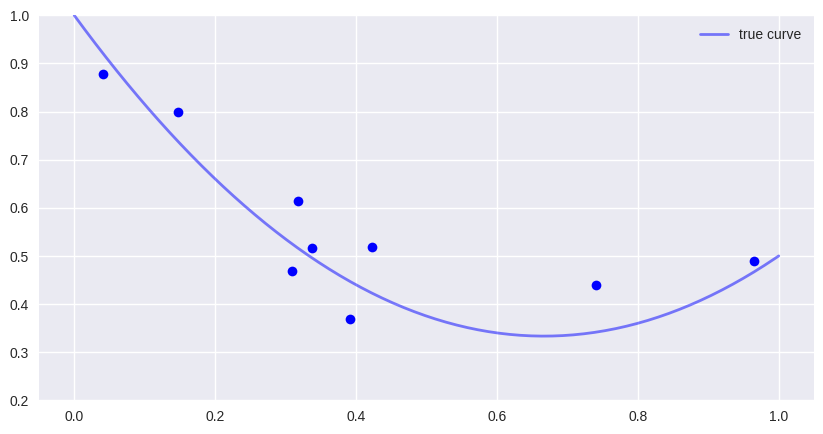

In [2]:
N=10
x=np.random.random(N)
x.sort()
y=(1.5*x**2-2*x+1)+np.random.normal(scale=0.1,size=N)
X=x.reshape(-1,1)  # scikit predictors expect a matrix 

xx=np.linspace(0,1,200)
yy_true=(1.5*xx**2-2*xx+1)
_,ax=plt.subplots(figsize=(10,5))
ax.plot(x,y,"bo")
ax.plot(xx,yy_true,"b-",alpha=0.5,linewidth=2,label="true curve")
ax.legend()
ax.set_ylim(0.2,1)
plt.show()

## Fit with high degree polynomial

First let's fit the data with a high degree polynomial without any regularisation

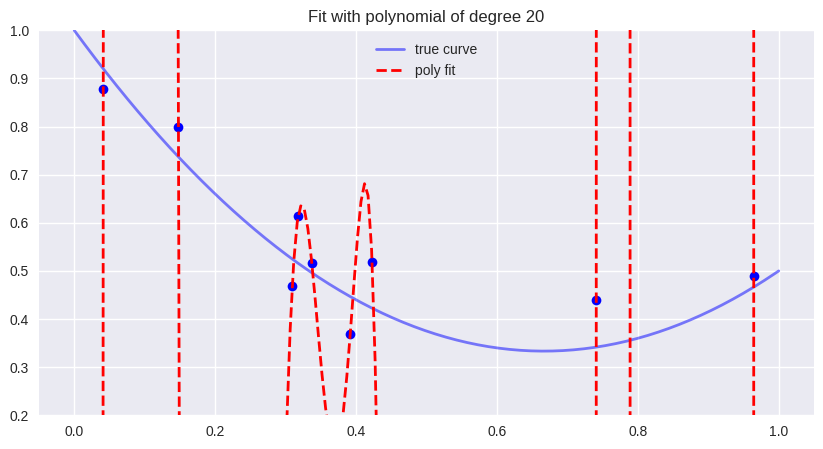

In [3]:
## the PolynomialFeatures-transformer lets us turn any linear regressor into a polynomial one of high degree
poly=sklearn.preprocessing.PolynomialFeatures(degree=20)

linear=sklearn.linear_model.LinearRegression()
linear.fit(poly.fit_transform(X),y)
yy1=linear.predict(poly.transform(xx.reshape(-1,1)))
# why the reshape? scikit's predictors expect 2d data, with one row vector per datapoint

## plotting code
_,ax=plt.subplots(figsize=(10,5))
ax.plot(x,y,"bo")
ax.plot(xx,yy_true,"b-",label="true curve",alpha=0.5,linewidth=2)
ax.plot(xx,yy1,"r--",label="poly fit",linewidth=2)
ax.legend()
ax.set_title("Fit with polynomial of degree 20")
ax.set_ylim(0.2,1)
plt.show()

Obviously, a very bad fit.

## Now with regularisation

We do the same again, ie fit with 20-degree polynomial, but this time we add Tikhonov regularisation with different strengths. In scikit-learn, this is realised by the Ridge (regression) class.

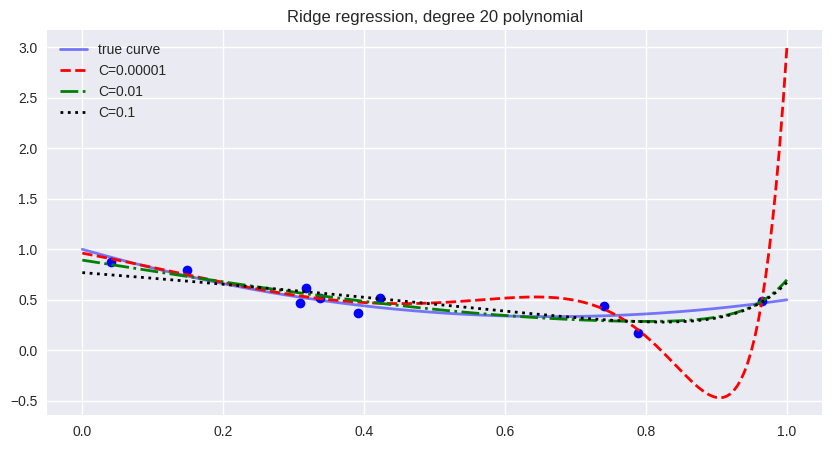

In [4]:
poly=sklearn.preprocessing.PolynomialFeatures(degree=20)

# strength of regularisation is controlled by parameter alpha
ridge=sklearn.linear_model.Ridge(alpha=0.0001)
ridge.fit(poly.fit_transform(X),y)
yy1=ridge.predict(poly.transform(xx.reshape(-1,1)))

ridge=sklearn.linear_model.Ridge(alpha=0.01)
ridge.fit(poly.fit_transform(X),y)
yy2=ridge.predict(poly.transform(xx.reshape(-1,1)))

ridge=sklearn.linear_model.Ridge(alpha=0.1)
ridge.fit(poly.fit_transform(X),y)
yy3=ridge.predict(poly.transform(xx.reshape(-1,1)))

## plotting code
_,ax=plt.subplots(figsize=(10,5))
ax.plot(x,y,"bo")
ax.plot(xx,yy_true,"b-",label="true curve",alpha=0.5,linewidth=2)
ax.plot(xx,yy1,"r--",label="C=0.00001",linewidth=2)
ax.plot(xx,yy2,"g-.",label="C=0.01",linewidth=2)
ax.plot(xx,yy3,"k:",label="C=0.1",linewidth=2)
ax.legend()
ax.set_title("Ridge regression, degree 20 polynomial")
plt.show()

A much better fit, at least with the stronger regularisation strengths.

## Now with L1-regularisation

This is also called LASSO regression and provided by the Lasso class. We set the strength to <code>alpha=0.001</code> for L1 and for L2-regularisation.

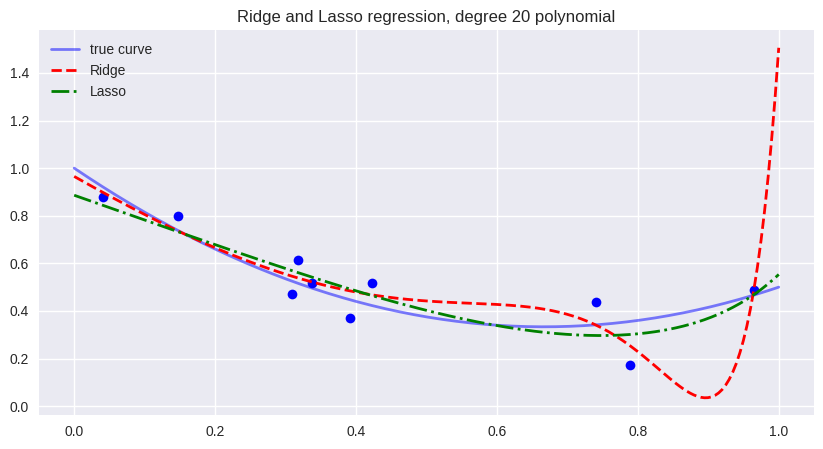

In [5]:
poly=sklearn.preprocessing.PolynomialFeatures(degree=20)

ridge=sklearn.linear_model.Ridge(alpha=0.001)
ridge.fit(poly.fit_transform(X),y)
yy1=ridge.predict(poly.transform(xx.reshape(-1,1)))

lasso=sklearn.linear_model.Lasso(alpha=0.001,max_iter=10000)
lasso.fit(poly.fit_transform(X),y)
yy2=lasso.predict(poly.transform(xx.reshape(-1,1)))

## plotting code
_,ax=plt.subplots(figsize=(10,5))
ax.plot(x,y,"bo")
ax.plot(xx,yy_true,"b-",label="true curve",alpha=0.5,linewidth=2)
ax.plot(xx,yy1,"r--",label="Ridge",linewidth=2)
ax.plot(xx,yy2,"g-.",label="Lasso",linewidth=2)
ax.legend()
ax.set_title("Ridge and Lasso regression, degree 20 polynomial")
plt.show()

Lasso looks a bit better here, but at least on the left, Ridge doesn't look so bad either.

What is clear however is that in both cases regularisation is able to prevent blatant overfitting.